# 作业
+ 作业1：fasttext刚才做的是二分类，大家下去基于word2vec + lr的数据集，尝试下12分类。
+ 作业2：思考题，LSTM的tanh可以换成relu吗？

## 作业1

In [1]:
import numpy as np
import pandas as pd
import jieba 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support

In [2]:
# 读取数据并将数据拼接在一起方便一起处理
train_df = pd.read_csv('./data/text_train.txt', sep='\t', header=None)
test_df = pd.read_csv('./data/text_test.txt', sep='\t', header=None)

In [3]:
df = pd.concat([train_df, test_df])

In [4]:
df.head()

,0,1
0,娱乐,《青蛇》造型师默认新《红楼梦》额妆抄袭（图） 凡是看过电影《青蛇》的人，都不会忘记青白二蛇的...
1,娱乐,６．１６日剧榜 ＜最后的朋友＞ 亮最后杀招成功登顶 《最后的朋友》本周的电视剧排行榜单依然只...
2,娱乐,超乎想象的好看《纳尼亚传奇２：凯斯宾王子》 现时资讯如此发达，搜狐电影评审团几乎人人在没有看...
3,娱乐,吴宇森：赤壁大战不会出现在上集 “希望《赤壁》能给你们不一样的感觉。”对于自己刚刚拍完的影片...
4,娱乐,组图：《多情女人痴情男》陈浩民现场耍宝 陈浩民：外面的朋友大家好，现在是搜狐现场直播，欢迎《...


In [5]:
df.columns = ['label', 'content']

## 标签处理部分

In [6]:
# 对label编码 并转换为Fasttext对应的__label__格式
labelEncode = LabelEncoder()
df['label'] = labelEncode.fit_transform(df['label'])

# label 映射
label_map = {}
for name, group in df.groupby(df.columns[0]):
    label_map[name] = "__label__" + str(name)

df['label'] = df['label'].map(lambda x: label_map[x])

In [7]:
df_label_temp = df['content']
df.drop(labels=['content'], axis=1, inplace=True)
df.insert(0, 'content', df_label_temp)

## 分词处理部分

In [8]:
# 得到stopwords_set
with open('./data/stopwords.txt', encoding='utf-8') as file:
    line_list = file.readlines()
    stopwords_list = [k.strip() for k in line_list]
    stopwords_set = set(stopwords_list)

In [9]:
# 分词并去掉stopwords
# 分词
def cut_word(content, stopword_set):
    cutWords = [k for k in jieba.cut(content, True) if k not in stopword_set]
    return ' '.join(cutWords)

df['content'] = df['content'].map(lambda x: cut_word(x, stopwords_set))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\HUZITO~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.448 seconds.
Prefix dict has been built successfully.


In [10]:
df

,content,label
0,青蛇 造型 造型师 默认 新 红楼 红楼梦 额 妆 抄袭 图 看过 过电 电影 青蛇 不...,__label__3
1,６．１６ 日剧 榜 ＜ 最后 朋友 ＞ 亮 最后 杀招 成功 登顶 最后 朋友 ...,__label__3
2,超乎 想象 好看 纳尼亚 尼亚 传奇 ２： 凯斯 宾 王子 现时 资讯 发达 搜狐 电影...,__label__3
3,吴宇森 赤壁 赤壁大战 大战 不会 出现 现在 上集 希望 赤壁 不一 感觉 。” 刚刚...,__label__3
4,组 图 ：《 多情 女人 痴情 男 陈浩民 现场 耍宝 陈浩民 外面 朋友 现在 搜狐 ...,__label__3
...,...,...
11995,撞破 男友 旧情 情人 同床 同床共枕 口述 何方 独 异乡 寂寞 日子 怕 无法 遏止...,__label__2
11996,画 诠释 毕加索 人生 图 第二 第二部 二部 部分 凄冷 蓝色 １９０１－１９０４...,__label__2
11997,女人 欧洲 欧洲杯 四大 大理 理由 四年 一度 欧洲 欧洲杯 进入 现在 进行 行时 ...,__label__2
11998,女人 暴露 既要 性感 不失 失去 品味 千呼万唤 始 犹抱琵琶半遮面 琵琶 琵琶半...,__label__2


## 训练、测试、生成报告

In [11]:
# 构建数据集
# 按照原来给的方式构建训练、测试集；也可以直接利用df来构建
train_df = df[:24000]
test_df = df[24000:]

In [12]:
test_df.to_csv("data/ft_test_df_homework_text_train.txt", sep="\t", index=False, header=None)
train_df.to_csv("data/ft_train_df_homework_text_train.txt", sep="\t", index=False, header=None)

In [13]:
import fasttext
classifier = fasttext.train_supervised(input='./data/ft_train_df_homework_text_train.txt', dim=100, epoch=200, lr=0.1, wordNgrams=1, loss='softmax', label="__label__")

In [14]:
classifier.save_model('model/homoework_ft_classifier.model')

In [15]:
result = classifier.test('./data/ft_test_df_homework_text_train.txt')

In [16]:
print(result)

(12000, 0.906, 0.906)


In [17]:
# 生成报告
test_df_ = np.array(test_df["content"]).tolist()
# 要按照以下的方式 自定义编码。
# 不然会和下面预测predict的标签不对应 
# 因为直接labelencode会将"__label__10，__label__11"等编码为2和3 而不是__label__2-->2 
label_set = set(df['label'])
num_label_dict = {}
for key,value in enumerate(label_set):
    num_label_dict[value] = int(value.strip("__label__"))
num_label_dict

test_df['label'] = test_df['label'].map(num_label_dict)


test_label_list = test_df['label']
predict_label_list = [int(y.strip("__label__")) for x in test_df_ for y in classifier.predict(x)[0]]

pd.DataFrame(confusion_matrix(test_label_list, predict_label_list),
            columns=labelEncode.classes_,
            index=labelEncode.classes_)

C:\Users\Hu Zitong\AppData\Local\Temp\ipykernel_2072\3787411254.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['label'] = test_df['label'].map(num_label_dict)


,体育,健康,女人,娱乐,房地产,教育,文化,新闻,旅游,汽车,科技,财经
体育,981,0,3,5,0,0,0,4,2,0,1,4
健康,0,915,17,0,1,15,1,21,2,1,13,14
女人,0,7,950,6,1,4,13,6,6,1,5,1
娱乐,0,0,12,936,0,1,44,3,1,1,2,0
房地产,0,0,3,0,928,2,0,29,8,0,4,26
教育,0,8,5,6,1,936,1,28,4,1,6,4
文化,1,3,15,47,4,5,867,25,15,4,13,1
新闻,6,9,4,9,17,22,12,805,7,3,36,70
旅游,3,3,9,5,8,2,27,20,896,5,16,6
汽车,5,7,4,1,1,1,1,11,7,942,7,13


In [18]:
def ft_eval_model(test_label_list, predict_label_list, className_list):
    # 计算每个分类的Precision, Recall, f1, support
    p, r, f1, s = precision_recall_fscore_support(test_label_list, predict_label_list)
    # 计算总体的平均Precision, Recall, f1, support
    total_p = np.average(p, weights=s)
    total_r = np.average(r, weights=s)
    total_f1 = np.average(f1, weights=s)
    total_s = np.sum(s)
    res1 = pd.DataFrame({
        u'Label': className_list,
        u'Precision': p,
        u'Recall': r,
        u'F1': f1,
        u'Support': s
    })
    res2 = pd.DataFrame({
        u'Label': ['总体'],
        u'Precision': [total_p],
        u'Recall': [total_r],
        u'F1': [total_f1],
        u'Support': [total_s]
    })
    res2.index = [999]
    res = pd.concat([res1, res2])
    return res[['Label', 'Precision', 'Recall', 'F1', 'Support']]

ft_eval_model(test_label_list, predict_label_list, labelEncode.classes_)

,Label,Precision,Recall,F1,Support
0,体育,0.983952,0.981,0.982474,1000
1,健康,0.952133,0.915,0.933197,1000
2,女人,0.924125,0.950,0.936884,1000
3,娱乐,0.920354,0.936,0.928111,1000
4,房地产,0.939271,0.928,0.933602,1000
5,教育,0.932271,0.936,0.934132,1000
6,文化,0.886503,0.867,0.876643,1000
7,新闻,0.753745,0.805,0.778530,1000
8,旅游,0.930426,0.896,0.912888,1000
9,汽车,0.970134,0.942,0.955860,1000


## 作业2

先看一下tanh和relu的图像\
<font size=5>tanh
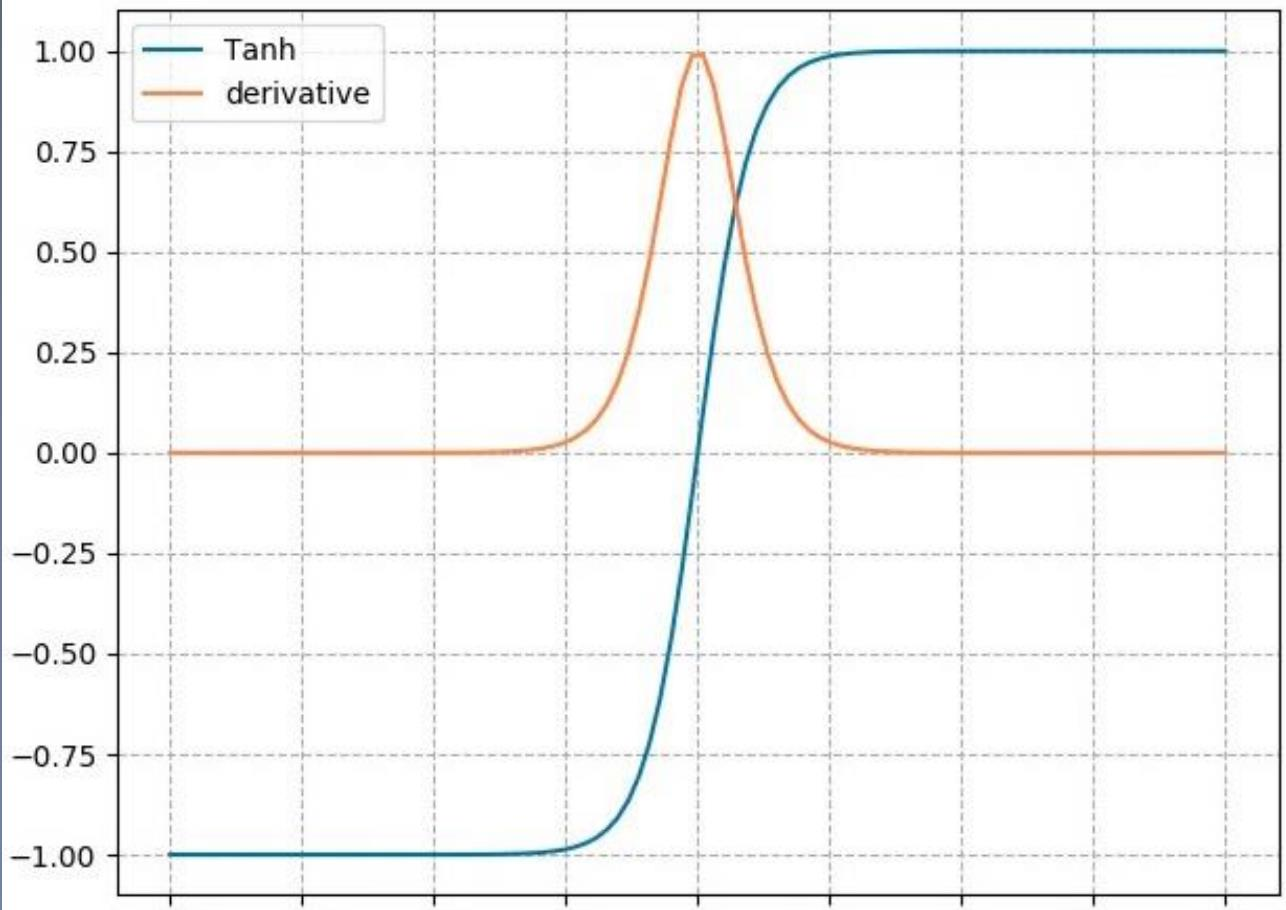

<font size=5>ReLU
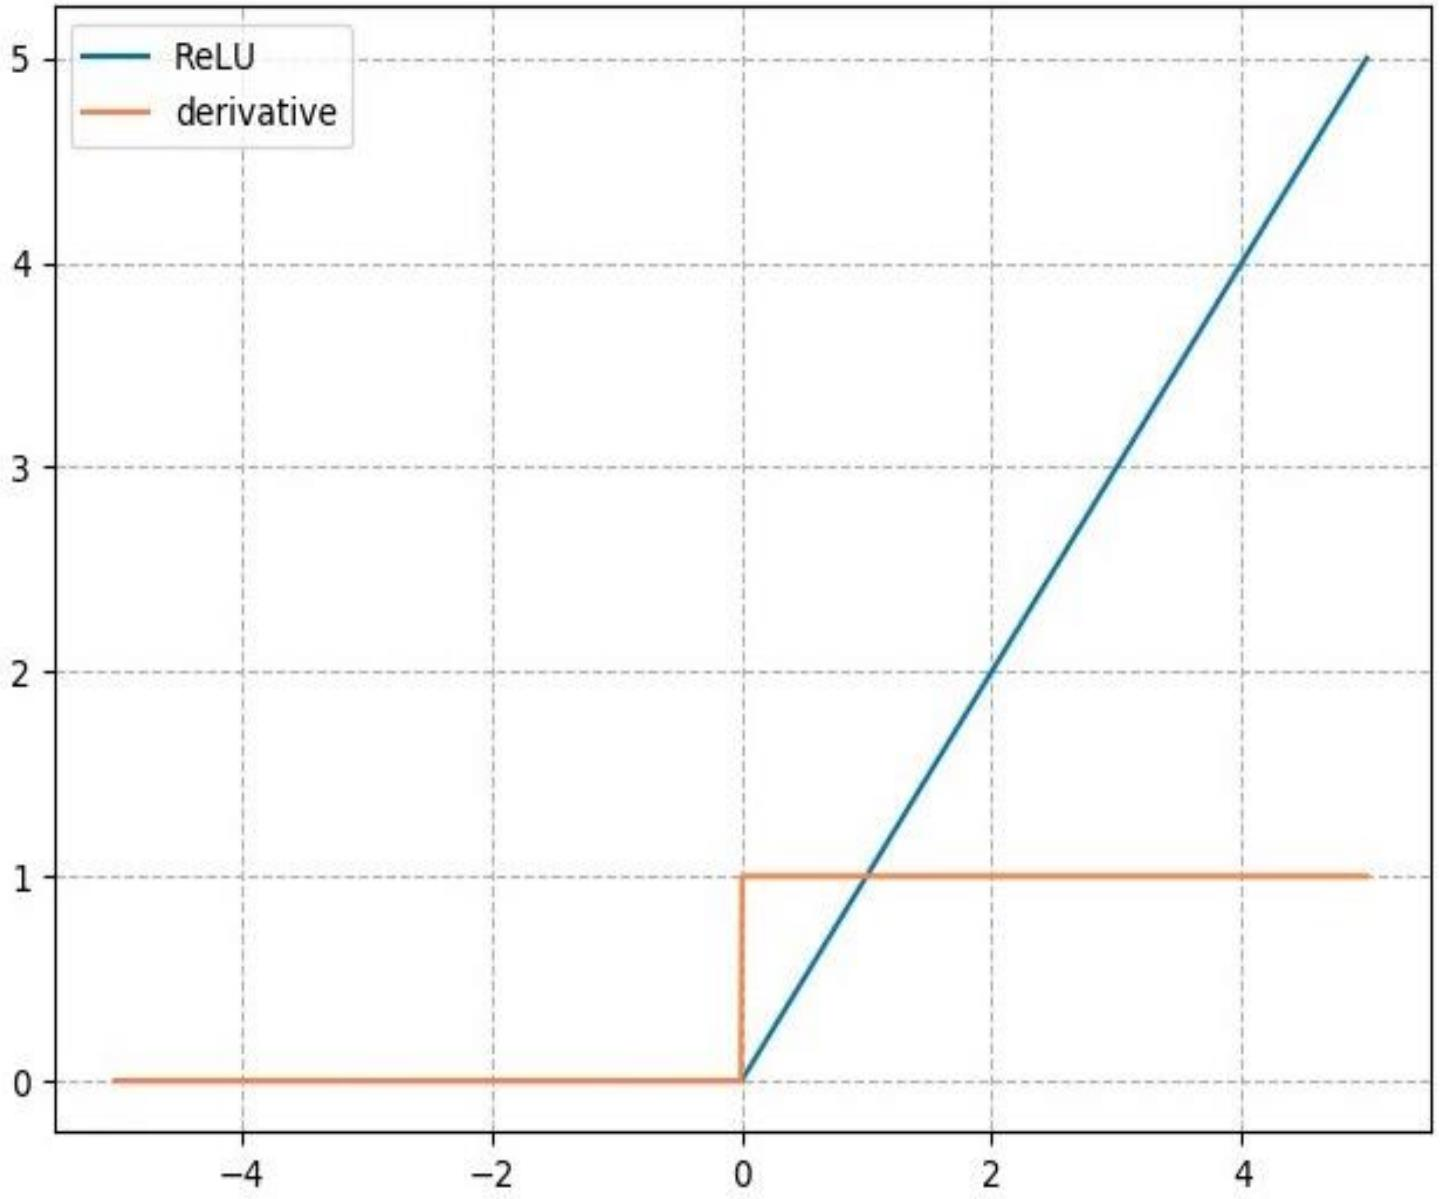

ReLU的特性就是：
+ 输出值均为正值、负半轴会导致死神经元；
+ 导数是1，缓解了梯度消失，容易导致梯度爆炸。

在实际使用的时候，如果将tanh换成ReLU的话很容易就会导致梯度爆炸的问题，这是在RNN、LSTM中很常见的问题。但是对于ReLU可以用Gradient Clipping、设置所有参数的变化范围等来避免梯度爆炸。也可以对ReLU函数进行修改，将其变成有饱和区，有负输出（类似leakyReLU，当然这都是后话。）\
如果在LSTM上直接将tanh换成RelU的话还是不太建议，会有梯度爆炸的风险。